In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Users\nipun\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read in data
nyc_airbnb = pd.read_csv('AB_NYC_2019.csv')
nyc_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#check for missing values
nyc_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
#dropping columns that aren't useful for visualizations 
nyc_airbnb.drop(['id','host_id','name','host_name','last_review'], axis=1, inplace=True)
#check dataset
nyc_airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [5]:
# #replacing all NaN values in 'reviews_per_month' with 0
nyc_airbnb.fillna({'reviews_per_month':0}, inplace=True)

#check dataset
nyc_airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [6]:
# #check for missing values
nyc_airbnb.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Visualizations

Text(0.5, 1.0, 'Number of Listings in each Neighbourhood Group')

Text(0.5, 0, 'Neighbourhood Group')

Text(0, 0.5, 'Number of Listings')

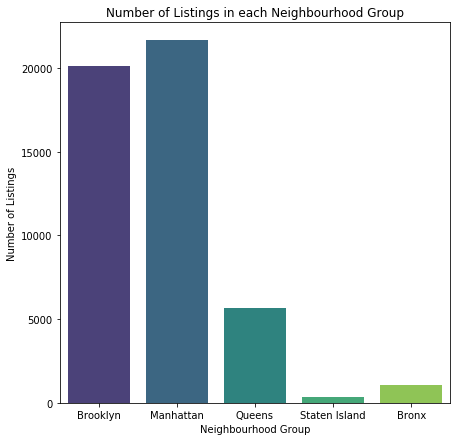

In [7]:
#distribution of neighbourhood_group
sns.countplot(nyc_airbnb['neighbourhood_group'], palette="viridis")
fig_neighborhood = plt.gcf()
fig_neighborhood.set_size_inches(7,7)
plt.title('Number of Listings in each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')

Text(0.5, 1.0, 'Number of Listings Among Room Types')

Text(0, 0.5, 'Number of Listings')

Text(0.5, 0, 'Room Type')

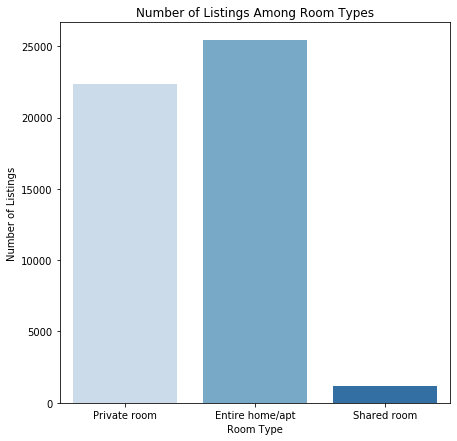

In [8]:
#Room types distribution
sns.countplot(nyc_airbnb['room_type'], palette="Blues")
fig_roomtype = plt.gcf()
fig_roomtype.set_size_inches(7,7)
plt.title('Number of Listings Among Room Types')
plt.ylabel('Number of Listings')
plt.xlabel('Room Type')

<Figure size 1800x1080 with 0 Axes>

(-0.5, 1919.5, 1079.5, -0.5)

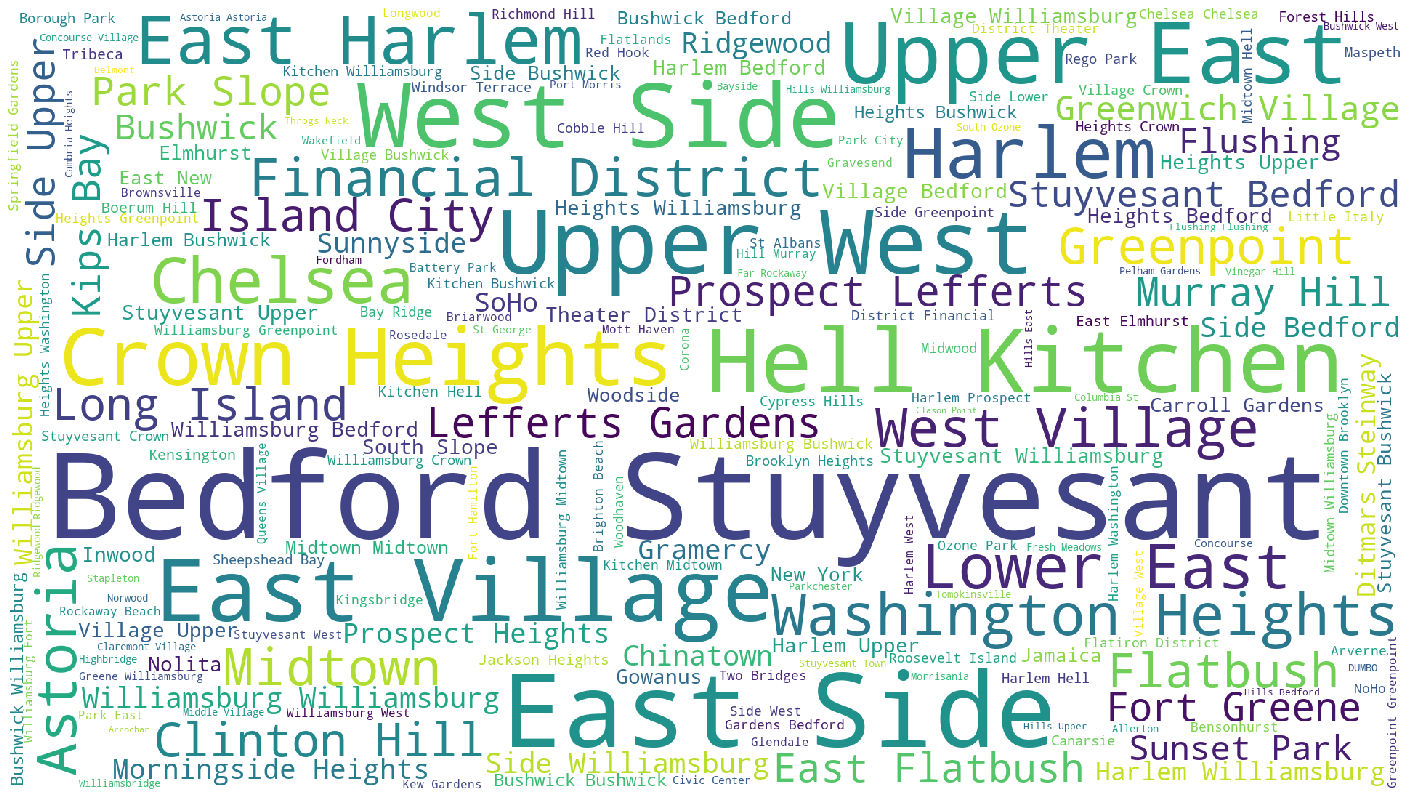

In [9]:
#word cloud of neighborhoods
wordcloud = WordCloud(width=1920,height=1080,background_color='white').generate(" ".join(nyc_airbnb.neighbourhood))
plt.figure(figsize = (25, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Model Preprocessing

In [10]:
#dropping columns that aren't useful for models 
nyc_airbnb.drop(['latitude','longitude'], axis=1, inplace=True)
#check dataset
nyc_airbnb.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [11]:
#Encode categorical variables
def catego_vars(nyc_airbnb):
    for column in nyc_airbnb.columns[nyc_airbnb.columns.isin(['neighbourhood_group','neighbourhood','room_type'])]:
        nyc_airbnb[column] = nyc_airbnb[column].factorize()[0]
    return nyc_airbnb

nyc_airbnb = catego_vars(nyc_airbnb)
nyc_airbnb.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,0,0,149,1,9,0.21,6,365
1,1,1,1,225,1,45,0.38,2,355
2,1,2,0,150,3,0,0.00,1,365
3,0,3,1,89,1,270,4.64,1,194
4,1,4,1,80,10,9,0.10,1,0


<Figure size 576x360 with 0 Axes>

(9.0, 0.0)

Text(0.5, 1, 'Correlation Matrix')

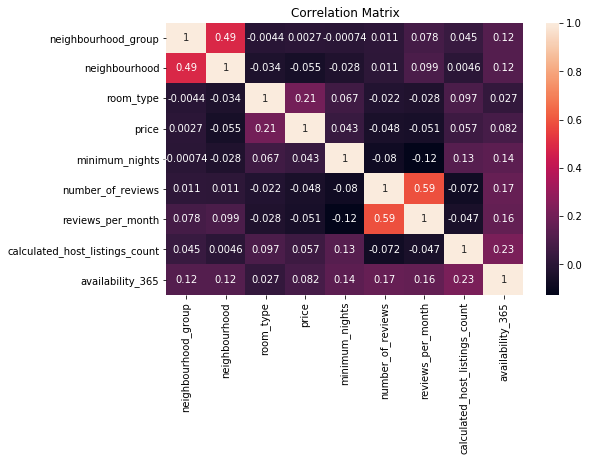

In [12]:
#check for highly correlated variables
correlation = nyc_airbnb.corr(method='pearson')
plt.figure(figsize=(8,5))
ax = sns.heatmap(correlation, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix')

In [13]:
#drop highly correlated variables
nyc_airbnb.drop(['reviews_per_month','neighbourhood_group'], axis=1, inplace=True)
nyc_airbnb.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,149,1,9,6,365
1,1,1,225,1,45,2,355
2,2,0,150,3,0,1,365
3,3,1,89,1,270,1,194
4,4,1,80,10,9,1,0


In [14]:
from sklearn.model_selection import train_test_split
#split data into training and testing
y = nyc_airbnb[['price']]
ind_vars = ['neighbourhood','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count',
            'availability_365']
X = nyc_airbnb[ind_vars]
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=23)

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn import preprocessing, metrics

In [16]:
#Linear regression
lin_reg = LinearRegression().fit(X_train, y_train)

#R squared 
lin_reg.score(X_train, y_train)

#Predictions
y_pred = lin_reg.predict(X_test)

#RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.05360311147923347

211.5699258123551

In [17]:
#OLS Regression table to get more statistics of regression
Xtrain2 = sm.add_constant(X_train)
lin_reg2 = sm.OLS(y_train, Xtrain2)
lin_reg3 = lin_reg2.fit()
print(lin_reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     346.1
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:25:12   Log-Likelihood:            -2.5306e+05
No. Observations:               36671   AIC:                         5.061e+05
Df Residuals:                   36664   BIC:                         5.062e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [19]:
#initial model
random_forest = RandomForestRegressor(n_estimators=200, max_depth=40, min_samples_split=6, min_samples_leaf = 3,
                                       n_jobs=-1, random_state=23)
random_forest.fit(X_train, y_train)

#r2
print(random_forest.score(X_train, y_train))

#predictions
rfy_pred = random_forest.predict(X_test)

#rmse
print(np.sqrt(metrics.mean_squared_error(y_test,rfy_pred)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=23, verbose=0,
                      warm_start=False)

0.5029394119290211
207.62786212500737


In [20]:
#with cross validation
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 4)]
max_depth.append(None)
min_samples_split = [2, 4, 6]
min_samples_leaf = [2, 4, 6]
bootstrap = [True, False]

#random grid
rf_rand_grid = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}

print(rf_rand_grid)

{'n_estimators': [100, 233, 366, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 23, 36, 50, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6], 'bootstrap': [True, False]}


In [22]:
rand_forest2 = RandomForestRegressor()
# random search 
rand_forest2cv = RandomizedSearchCV(estimator = rand_forest2, param_distributions = rf_rand_grid,
                                n_iter = 5, cv = 3, verbose=2, random_state=23, n_jobs = -1)
# Fit 
rand_forest2cv.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   51.2s remaining:   44.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...o

In [23]:
#best parameters
rand_forest2cv.best_params_

#R2
rand_forest2cv.score(X_train, y_train)

#RMSE
y_predrf2= rand_forest2cv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_predrf2)))

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 23,
 'bootstrap': False}

0.4986724576533206

202.96576715820822


Text(0.5, 0, 'Feature importance')

Text(0.5, 1.0, 'Feature Importance Chart')

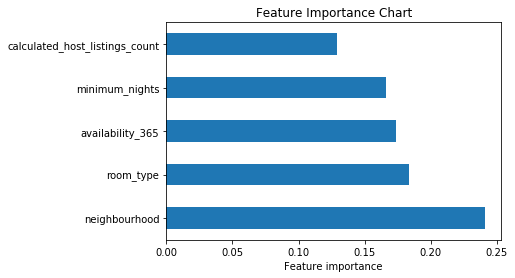

In [24]:
feat_importances = pd.Series(rand_forest2cv.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("Feature importance")
plt.title("Feature Importance Chart")